In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pybaseball import pitching_stats
from pybaseball import cache
from pybaseball import statcast
from statistics import mode
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import seaborn as sns
import lightgbm as lgb

In [2]:
era2021 = pd.read_csv("stats2021.csv")
era2022 = pd.read_csv("stats2022.csv")
pred_model = pd.read_csv("model_player_rankings_2021.csv")

In [3]:
pred_ranked_list = pd.Series(data = pred_model["model_preds"])
pred_ranked_list.index = pred_model["player_name"]


In [4]:
era2021 = era2021.sort_values("p_era")
era2022 = era2022.sort_values("p_era")

In [8]:
era2021["name"] = era2021.apply(lambda row: f"{row['last_name']},{row[' first_name']}", axis=1)
era2022["name"] = era2022.apply(lambda row: f"{row['last_name']},{row[' first_name']}", axis=1)

era_player_2021 = pd.Series(data = era2021["p_era"])
era_player_2021.index = era2021["name"]
era_player_2022 = pd.Series(data = era2022["p_era"])
era_player_2022.index = era2022["name"]

In [6]:
# Convert highest value to first index by "flipping indices" and taking absolute value
common_names = list(set(era_player_2021.index).intersection(pred_ranked_list.index).intersection(era_player_2022.index))
pred_ranked_values = pred_model["model_preds"][common_names].sort_values(ascending=False)
pred_ranked_list = np.abs(pred_ranked_values.argsort() - len(pred_ranked_values) + 1)

era_player_2021 = era_player_2021[common_names] 
era_player_2022 = era_player_2022[common_names] 

era_ranked_list_2021 = era_player_2021.sort_values(ascending=True).argsort()
era_ranked_list_2022 = era_player_2022.sort_values(ascending=True).argsort()



print(np.corrcoef(era_ranked_list_2022[common_names], pred_ranked_list[common_names]))
print(np.corrcoef(era_ranked_list_2021[common_names], era_ranked_list_2022[common_names]))


[[1.         0.58449569]
 [0.58449569 1.        ]]
[[1.         0.44151153]
 [0.44151153 1.        ]]


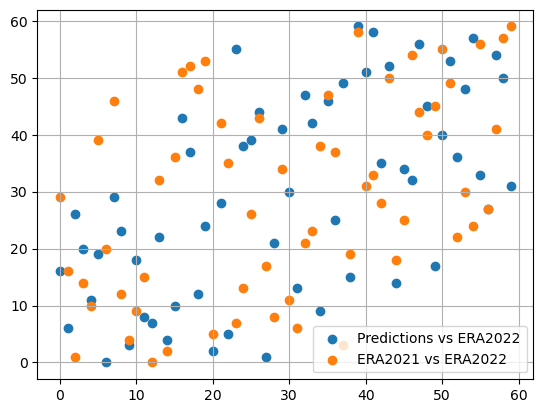

In [7]:
plt.scatter(era_ranked_list_2022[common_names], pred_ranked_list[common_names], label = "Predictions vs ERA2022")
plt.scatter(era_ranked_list_2022[common_names], era_ranked_list_2021[common_names], label = "ERA2021 vs ERA2022")
plt.grid()
plt.legend()

